# Felipe Veloso Desaf 11

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels

plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

In [2]:
df = pd.read_csv('Credit.csv').drop('Unnamed: 0', axis=1)

In [3]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [4]:
df['Gender'].value_counts()

Female    207
 Male     193
Name: Gender, dtype: int64

In [5]:
df['Ethnicity'].value_counts()

Caucasian           199
Asian               102
African American     99
Name: Ethnicity, dtype: int64

In [6]:
df_bin = pd.get_dummies(df)

In [7]:
df_bin.head()

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_ Male,Gender_Female,Student_No,Student_Yes,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
0,14.891,3606,283,2,34,11,333,1,0,1,0,0,1,0,0,1
1,106.025,6645,483,3,82,15,903,0,1,0,1,0,1,0,1,0
2,104.593,7075,514,4,71,11,580,1,0,1,0,1,0,0,1,0
3,148.924,9504,681,3,36,11,964,0,1,1,0,1,0,0,1,0
4,55.882,4897,357,2,68,16,331,1,0,1,0,0,1,0,0,1


# Desafío 2: Genere gráficos descriptivos para las variables contínuas

In [8]:
def plot_hist(variable,df):
    sns.distplot(df[variable], label=variable)
    plt.axvline(df[variable].mean(), lw=3, color='tomato',linestyle="--", label='Media')
    plt.axvline(df[variable].median(), lw=3, color='blue',linestyle="--", label='Mediana')
    plt.legend()

/Users/feedingthemachine/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


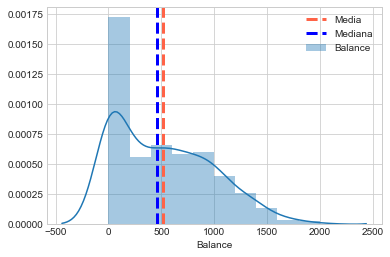

In [9]:
plot_hist('Balance',df_bin)

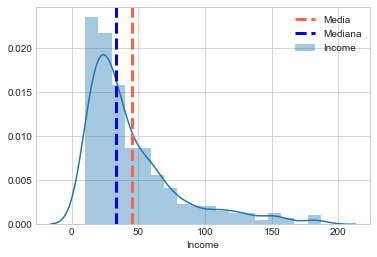

In [10]:
plot_hist('Income', df_bin)

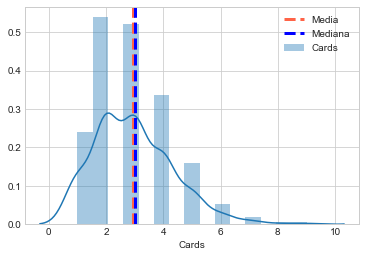

In [11]:
plot_hist('Cards', df_bin)

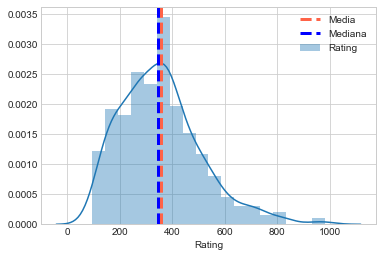

In [12]:
plot_hist('Rating',df_bin)

Se podria inferir con un margen de error que estas se distribuyen de manera normal.

# Desafío 3: Regresión Lineal Simple 

In [13]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [37]:
modelo_student = smf.ols('Balance ~ Student_Yes',df_bin).fit()
modelo_student_no = smf.ols('Balance ~ Student_No',df_bin).fit()
modelo_income = smf.ols('Balance ~ Income',df_bin).fit()
modelo_rating = smf.ols('Balance ~ Rating',df_bin).fit()

In [38]:
modelo_student.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     28.62
Date:                Tue, 18 Jun 2019   Prob (F-statistic):           1.49e-07
Time:                        19:55:08   Log-Likelihood:                -3005.5
No. Observations:                 400   AIC:                             6015.
Df Residuals:                     398   BIC:                             6023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     480.3694     23.434     20.499      0.000     434.300     526.439
Student_Yes   396.4556     74.104      5.350      0.000     250.771     542.140
==============================================================================
Omnibus:                       20.866   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.920
Skew:                           0.544   Prob(JB):                     1.74e-05
Kurtosis:                       2.637   Cond. No.                         3.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
modelo_student_no.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     28.62
Date:                Tue, 18 Jun 2019   Prob (F-statistic):           1.49e-07
Time:                        19:55:08   Log-Likelihood:                -3005.5
No. Observations:                 400   AIC:                             6015.
Df Residuals:                     398   BIC:                             6023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    876.8250     70.302     12.472      0.000     738.616    1015.034
Student_No  -396.4556     74.104     -5.350      0.000    -542.140    -250.771
==============================================================================
Omnibus:                       20.866   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.920
Skew:                           0.544   Prob(JB):                     1.74e-05
Kurtosis:                       2.637   Cond. No.                         6.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
df_bin['Student_Yes'] == 1
df_bin[df_bin['Student_Yes'] == 1]['Balance'].mean()

876.825

In [80]:
df_bin['Student_Yes'] == 0
df_bin[df_bin['Student_Yes'] == 0]['Balance'].mean()

480.36944444444447

In [30]:
modelo_income.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     109.0
Date:                Tue, 18 Jun 2019   Prob (F-statistic):           1.03e-22
Time:                        19:53:48   Log-Likelihood:                -2970.9
No. Observations:                 400   AIC:                             5946.
Df Residuals:                     398   BIC:                             5954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    246.5148     33.199      7.425      0.000     181.247     311.783
Income         6.0484      0.579     10.440      0.000       4.909       7.187
==============================================================================
Omnibus:                       42.505   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.975
Skew:                           0.384   Prob(JB):                     2.79e-05
Kurtosis:                       2.182   Cond. No.                         93.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
modelo_rating.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1168.
Date:                Tue, 18 Jun 2019   Prob (F-statistic):          1.90e-120
Time:                        19:49:02   Log-Likelihood:                -2745.4
No. Observations:                 400   AIC:                             5495.
Df Residuals:                     398   BIC:                             5503.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -390.8463     29.069    -13.446      0.000    -447.993    -333.699
Rating         2.5662      0.075     34.176      0.000       2.419       2.714
==============================================================================
Omnibus:                       23.223   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.802
Skew:                           0.390   Prob(JB):                     3.75e-09
Kurtosis:                       4.311   Cond. No.                         970.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

El modelo que mejor explica la relacion con el balance es Balance - Rating con un 75%

Parte B - De la relacion de estudiantes vemos que el modelo no se ajusta mucho no mas del 6% en adicion inferimos que la persona que estudio tiende a estar mas endeudado en promedio de quien no estudia

In [63]:
df_bin['Gender_Male'] = df_bin['Gender_ Male']
df_bin['Ethnicity_African_American'] = df_bin['Ethnicity_African American']
df_bin.drop('Gender_ Male',axis=1)
df_bin.drop('Ethnicity_African American' , axis=1)

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_ Male,Gender_Female,Student_No,Student_Yes,Married_No,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian,Gender_Male,Ethnicity_African_American
0,14.891,3606,283,2,34,11,333,1,0,1,0,0,1,0,1,1,0
1,106.025,6645,483,3,82,15,903,0,1,0,1,0,1,1,0,0,0
2,104.593,7075,514,4,71,11,580,1,0,1,0,1,0,1,0,1,0
3,148.924,9504,681,3,36,11,964,0,1,1,0,1,0,1,0,0,0
4,55.882,4897,357,2,68,16,331,1,0,1,0,0,1,0,1,1,0
5,80.180,8047,569,4,77,10,1151,1,0,1,0,1,0,0,1,1,0
6,20.996,3388,259,2,37,12,203,0,1,1,0,1,0,0,0,0,1
7,71.408,7114,512,2,87,9,872,1,0,1,0,1,0,1,0,1,0
8,15.125,3300,266,5,66,13,279,0,1,1,0,1,0,0,1,0,0
9,71.061,6819,491,3,41,19,1350,0,1,0,1,0,1,0,0,0,1


In [50]:
no_student = df_bin.query('Student_Yes==0')['Balance']
student = df_bin.query('Student_Yes==1')['Balance']
stats.ttest_ind(student,no_student)

Ttest_indResult(statistic=5.349964123075003, pvalue=1.4877341077323024e-07)

De esto podemos inferir que la variable es significativa al modelo, ya que puede explicar situaciones del modelo mismo

# Desafío 4: Genere un modelo que incluya todos los regresores

In [59]:
df_bin.columns.values

array(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
       'Balance', 'Gender_ Male', 'Gender_Female', 'Student_No',
       'Student_Yes', 'Married_No', 'Married_Yes',
       'Ethnicity_African American', 'Ethnicity_Asian',
       'Ethnicity_Caucasian', 'Gender_Male', 'Ethnicity_African_American'],
      dtype=object)

In [69]:
all_reg = smf.ols('Balance ~ Limit + Rating + Cards+Age+Education+ Income + Gender_Female + Student_No + Married_Yes + Ethnicity_African_American + Ethnicity_Asian', df_bin).fit()
all_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     750.3
Date:                Tue, 18 Jun 2019   Prob (F-statistic):          1.11e-253
Time:                        20:30:29   Log-Likelihood:                -2398.7
No. Observations:                 400   AIC:                             4821.
Df Residuals:                     388   BIC:                             4869.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    -43.3535     38.582     -1.124      0.262    -119.209      32.502
Limit                          0.1909      0.033      5.824      0.000       0.126       0.255
Rating                         1.1365      0.491      2.315      0.021       0.171       2.102
Cards                         17.7245      4.341      4.083      0.000       9.190      26.259
Age                           -0.6139      0.294     -2.088      0.037      -1.192      -0.036
Education                     -1.0989      1.598     -0.688      0.492      -4.241       2.043
Income                        -7.8031      0.234    -33.314      0.000      -8.264      -7.343
Gender_Female                -10.6532      9.914     -1.075      0.283     -30.145       8.839
Student_No                  -425.7474     16.723    -25.459      0.000    -458.626    -392.869
Married_Yes                   -8.5339     10.363     -0.824      0.411     -28.908      11.841
Ethnicity_African_American   -10.1070     12.210     -0.828      0.408     -34.113      13.899
Ethnicity_Asian                6.6972     12.122      0.552      0.581     -17.137      30.531
==============================================================================
Omnibus:                       34.899   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.766
Skew:                           0.782   Prob(JB):                     8.52e-10
Kurtosis:                       3.241   Cond. No.                     4.22e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Se aprecia, algunas variables que afectan el modelo de manera positiva, donde su comportamiento realmente afecta a nuestro modelo

# Desafío 5: Depure el modelo e incluya sólo los predictores significativo

In [70]:
some_reg = smf.ols('Balance ~ Limit + Rating + Cards+Age+ Income  + Student_No', df_bin).fit()
some_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1380.
Date:                Tue, 18 Jun 2019   Prob (F-statistic):          1.58e-260
Time:                        20:31:09   Log-Likelihood:                -2400.5
No. Observations:                 400   AIC:                             4815.
Df Residuals:                     393   BIC:                             4843.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -68.1243     28.844     -2.362      0.019    -124.833     -11.416
Limit          0.1937      0.032      5.981      0.000       0.130       0.257
Rating         1.0912      0.485      2.251      0.025       0.138       2.044
Cards         18.2119      4.319      4.217      0.000       9.721      26.702
Age           -0.6241      0.292     -2.139      0.033      -1.198      -0.050
Income        -7.7951      0.233    -33.395      0.000      -8.254      -7.336
Student_No  -425.6099     16.510    -25.780      0.000    -458.068    -393.152
==============================================================================
Omnibus:                       34.091   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.623
Skew:                           0.772   Prob(JB):                     1.51e-09
Kurtosis:                       3.225   Cond. No.                     3.26e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

El modelo no mejoro en su eror observado, pero aun asi es mucho mas robusto ya que eliminando ciertas variables no se vio afectado

# Desafío 6:

/Users/feedingthemachine/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


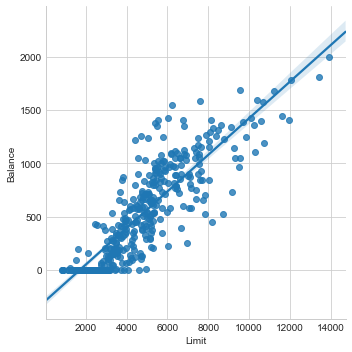

In [72]:
sns.lmplot('Limit', 'Balance', df_bin)

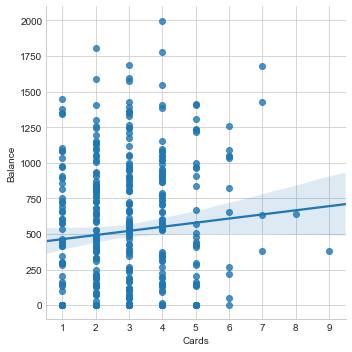

In [73]:
sns.lmplot('Cards', 'Balance', df_bin)

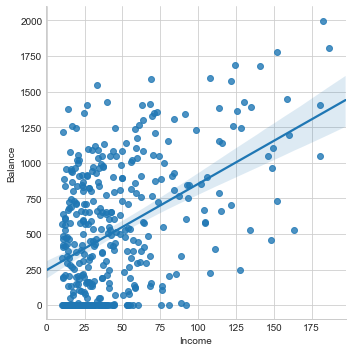

In [74]:
sns.lmplot('Income', 'Balance', df_bin)

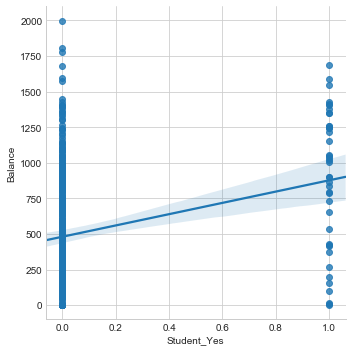

In [75]:
sns.lmplot('Student_Yes', 'Balance', df_bin)